# The Report is Attached as a markdown at the end of the file 

In [1]:
import numpy as np
import pandas as pd

In [3]:
candy_data = pd.read_csv("Lab Session1 Data_candy.csv")

In [4]:
features = candy_data.iloc[:,1:4]
features

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [5]:
C = candy_data.iloc[:,-1]
C

0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (, dtype: int64

In [21]:
# What is the dimensionality of the vector space for this data?
features.ndim

2

In [22]:
C.ndim

1

In [24]:
# How many vectors exist in this vector space?
features.shape
# row vector -> 10
# column vector -> 3

(10, 3)

In [25]:
C.shape
# row vector -> 10

(10,)

In [29]:
# What is the rank of Matrix A?
np.linalg.matrix_rank(features)

3

In [41]:
# Using Pseudo-Inverse find the cost of each product available for sale.
A_inverse = np.linalg.pinv(features)
A_inverse

array([[-0.01008596, -0.03124505,  0.01013951,  0.0290728 ,  0.0182907 ,
         0.01161794, -0.00771348,  0.00095458,  0.01743623, -0.00542016],
       [ 0.09059668,  0.07263726,  0.03172933, -0.09071908, -0.01893196,
        -0.06926996,  0.05675464,  0.03152577, -0.07641966,  0.00357352],
       [ 0.00299878,  0.15874243, -0.05795468, -0.06609024, -0.06295043,
         0.03348017,  0.01541831, -0.01070461,  0.00029003,  0.05938755]])

In [33]:
# X = A_inverse . C
X = np.dot(A_inverse, C)
X
# candy -> 1 rs
# Mangoes -> 55 rs
# Milk Packet -> 18 rs

array([ 1., 55., 18.])

In [49]:
# A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.

A_inverse_df = pd.DataFrame(A_inverse.reshape(10,-1))
A_inverse_df

,0,1,2
0,-0.010086,-0.031245,0.010140
1,0.029073,0.018291,0.011618
2,-0.007713,0.000955,0.017436
3,-0.005420,0.090597,0.072637
4,0.031729,-0.090719,-0.018932
5,-0.069270,0.056755,0.031526
6,-0.076420,0.003574,0.002999
7,0.158742,-0.057955,-0.066090
8,-0.062950,0.033480,0.015418
9,-0.010705,0.000290,0.059388


In [75]:
X

array([ 1., 55., 18.])

In [70]:
# Just running a regression to show that the value we found is same/almost the same as Linear Regression prediction
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, C, test_size=0.3, random_state=42)

In [71]:
regressor.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred = regressor.predict(X_test)
y_pred

array([148., 289., 167.])

In [73]:
y_test

8    148
1    289
5    167
Name: Payment (, dtype: int64

In [74]:
#to see the accuracy of our model using r squared intuition
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [69]:
# A3. Mark all customers (in “Purchase Data” table) with payments 
# above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers 
# into RICH or POOR class based on purchase behavior.
def rich_poor(value):
    if value > 200:
        return "RICH"
    else:
        return "POOR"
rich_or_poor = C.apply(rich_poor)
rich_or_poor

0    RICH
1    RICH
2    RICH
3    POOR
4    RICH
5    POOR
6    RICH
7    RICH
8    POOR
9    POOR
Name: Payment (, dtype: object

In [78]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, rich_or_poor, test_size=0.3, random_state=42)

In [80]:
log_regressor.fit(X_train,y_train)
y_pred = log_regressor.predict(X_test)

In [81]:
y_pred

array(['POOR', 'POOR', 'POOR'], dtype=object)

In [82]:
y_test

8    POOR
1    RICH
5    POOR
Name: Payment (, dtype: object

In [2]:
# A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. 
# Do the following after loading the data to your programming platform.
import numpy as np
import pandas as pd


In [4]:
#reading data from excel
data = pd.read_excel(r'Lab Session1 Data.xlsx', sheet_name='IRCTC Stock Price')

In [5]:
IRTSC_STOCK_DF = pd.DataFrame(data)
IRTSC_STOCK_DF

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [6]:
import statistics as st

In [11]:
# mean of the price
print(IRTSC_STOCK_DF['Price'].mean(axis=0))
# variance of teh price
print(st.variance(IRTSC_STOCK_DF['Price']))


1560.6634538152612
58732.365352539186


In [36]:
data_mean = IRTSC_STOCK_DF['Price'].mean(axis=0)

In [30]:
# Select the price data for all Wednesdays and calculate the sample mean
day_stock = IRTSC_STOCK_DF.groupby(by='Day').agg(['mean'])
day_stock

C:\Users\indir\AppData\Local\Temp\ipykernel_2972\1831483218.py:2: FutureWarning: ['Date', 'Month', 'Volume'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  day_stock = IRTSC_STOCK_DF.groupby(by='Day').agg(['mean'])


,Price,Open,High,Low,Chg%
,mean,mean,mean,mean,mean
Day,,,,,
Fri,1563.302041,1559.553061,1586.935714,1538.105102,0.004143
Mon,1571.580612,1568.473469,1597.866327,1543.288776,0.003951
Thu,1541.856000,1540.175000,1564.926000,1522.423000,0.001048
Tue,1575.840196,1575.419608,1601.522549,1554.650000,0.003604
Wed,1550.706000,1561.039000,1579.345000,1535.007000,-0.002874


In [31]:
1560.6634538152612 - 1550.706000

9.95745381526126

In [32]:
# Observation: The mean of all the days is 1560.6634538152612 and the mean of wednessday is 1550.706000,
# From this, we can see that wednessdays have dip in the price with a mean dip of 9.95745381526126 rs

In [35]:
#Select the price data for the month of Apr and calculate the sample mean

april_price_mean = IRTSC_STOCK_DF.groupby('Month').agg(['mean']).loc['Apr'].get(key='Price')
april_price_mean

C:\Users\indir\AppData\Local\Temp\ipykernel_2972\1142982740.py:1: FutureWarning: ['Date', 'Day', 'Volume'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  april_price_mean = IRTSC_STOCK_DF.groupby('Month').agg(['mean']).loc['Apr'].get(key='Price')


mean    1698.952632
Name: Apr, dtype: float64

In [37]:
data_mean - april_price_mean

mean   -138.289178
Name: Apr, dtype: float64

In [38]:
# Observations: Here we can observe that April has 138.289 rs more than the population mean, 
# so we tell that its a good time to sell back our stocks for profit

In [41]:
# From the Chg% (available in column I) find the probability of making a loss over the stock.

# calculating total no. of stocks
total_no_of_stocks = IRTSC_STOCK_DF['Price'].count()
total_no_of_stocks

249

In [42]:
# Creating a profit loss column
IRTSC_STOCK_DF['Profit / Loss'] = IRTSC_STOCK_DF['Chg%'].apply(lambda f: 'Profit' if f>0 else 'Loss')
IRTSC_STOCK_DF['Profit / Loss']

0      Profit
1      Profit
2        Loss
3        Loss
4        Loss
        ...  
244      Loss
245      Loss
246      Loss
247    Profit
248    Profit
Name: Profit / Loss, Length: 249, dtype: object

In [44]:
# calculating number of loss and number of profit
number_of_profit = IRTSC_STOCK_DF['Profit / Loss'].value_counts()['Profit']
print(number_of_profit)
number_of_loss = IRTSC_STOCK_DF['Profit / Loss'].value_counts()['Loss']
print(number_of_loss)

124
125


In [45]:
# Finding the probability of loss
probabilty_of_loss = number_of_loss/total_no_of_stocks
print(probabilty_of_loss)

0.5020080321285141


In [50]:
# Calculate the probability of making a profit on Wednesday
day_profit_loss = IRTSC_STOCK_DF.groupby(by=['Day','Profit / Loss']).agg({'Profit / Loss':'count'})
day_profit_loss

Profit / Loss
Day Profit / Loss               
Fri Loss                      28
    Profit                    21
Mon Loss                      27
    Profit                    22
Thu Loss                      24
    Profit                    26
Tue Loss                      17
    Profit                    34
Wed Loss                      29
    Profit                    21

In [57]:
wednessday = day_profit_loss.loc['Wed']
wednessday

,Profit / Loss
Profit / Loss,
Loss,29
Profit,21


In [72]:
no_of_profit_on_wednessday = wednessday.loc['Profit'][0]
total_no_of_wednessday = wednessday['Profit / Loss'].agg(['sum'])
no_of_profit_on_wednessday

21

In [76]:
# Calculate the probability of making a profit on Wednesday
probabilty_of_wednessday_profit = no_of_profit_on_wednessday / total_no_of_stocks
print(probabilty_of_wednessday_profit)

0.08433734939759036


In [74]:
# Calculate the conditional probability of making profit, given that today is Wednesday.
intersection_profit_wednessday = no_of_profit_on_wednessday
print("The Conditional Probability is equal to:",intersection_profit_wednessday/total_no_of_wednessday)

The Conditional Probability is equal to: sum    0.42
Name: Profit / Loss, dtype: float64


<AxesSubplot:xlabel='Day', ylabel='Chg%'>

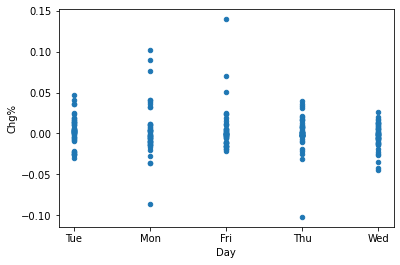

In [75]:
#plotting a scatter plot of Chg% data against the day of the week
IRTSC_STOCK_DF.plot.scatter(x = 'Day',y = 'Chg%')

# Report

### 1) Importance of Rank:
Rank shows us the number of independent column vectors which in turn helps us find the useful feature columns. Simply put, if Rank(A) < no_of_columns, then we can observe that there are dependent columns inside which can be ignored if we are building a Model. Since one can e derived from the other

### 2) Difference between on regression (Ex: A2) and classification (Ex: A3)
#### Regression:
Regression models are used to predict a value over a range, for example here in our dataset we would have to predict the cost of the purchase, so regression models are used.

#### Classification:
Classification, as the name suggests is used to classify different classes of things, like we take petal shape, dial diameter, petal colour as parameters and classify our input as one of the class of flowers. Here in our assignment, we classified the customer as Rich or Poor based on the purchase data 

### 3) Observing the stock data provided, record your suggestions to build a system that may be able to predict the price and Change % into future.

My suggestions for building a model for predicting future price and change % would be to build a Polynomial Regression model for prices, since price more or less depends upon the opening and closing, as well the day of the week it is being sold, so for forming a model that has three or four main parameters would be well predicted using a polynomial regression model. But the only downside, we would have to take care of overfitting.

My Other suggestion would be to use an Artificial Neural Network(ANN), because there might be many more intricate relationship between different combinations of our input in determining the price, which is almost impossible to be taken care by simple mathematical models